# Ganopolski 2024- Toward generalized Milankovitch theory 

In [5]:
from signal_models.ganopolski2024 import dVdt, calc_f
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Model 3
From Ganopolski et al. 2024:
`vc` = value for critical ice volume; controls the dominant periodicity and degree of asymmetry of glacial cycles
`f1` = insolation threshold for glacial inception (pinned at -20 to -15 W/m^2)
`t1` = relaxation time scale for glacial inception (in kyr)
`f2` = insolation threshold for deglaciation inception (tunable; positive)
`t2` = relaxation time scale for deglaciation (in kyr)

`A` = magnitude of forcing in Wm−2
`eps` = nondimensional magnitude of amplitude modulation


In [ ]:
k_init = 1 # Initial k; glacial state
v_init = 0
initial_conditions = [v_init, k_init]  # Initial v and k

The code works with: 

t = time in kyr
v = ice volume (nondimensional)
k = state of the system (1 = glacial, 2 = deglaciation)

Within the code, k is calulated according to:

- transition from a glacial (k=1) to deglaciation regime (k = 2) occurs if three conditions are met:
    - v > vc, 
    - dfdt > 0, 
    - f > 0.
        
- The transition from deglaciation (k=2) to glacial (k=1) regime occurs if:
    - f < glaciation threshold f1.
The interglacial state formally belongs to the deglaciation regime.

In [ ]:
tn = 2000
t_span = (0, tn)
t_eval = np.arange(0, tn, 1)

In [3]:
A = 25
eps = 0.5
f1 = -16
f2 = 16
vc = 1.4
t1 = 30
t2 = 100
vi = 0


solution = solve_ivp(
    dVdt,
    t_span,
    initial_conditions,
    dense_output=True,
    t_eval=t_eval, 
    args=(A, eps, f1, f2, t2, t1, vc),
)

/Users/jlanders/PycharmProjects/PaleoBeasts/signal_models/ganopolski2024.py:49: RuntimeWarning: invalid value encountered in sqrt
  return 1 + np.sqrt((f2 - f) / (f2 - f1))
/Users/jlanders/PycharmProjects/PaleoBeasts/signal_models/ganopolski2024.py:55: RuntimeWarning: invalid value encountered in sqrt
  return 1 - np.sqrt((f2 - f) / (f2 - f1))


Text(0.5, 0, 'time (kyr)')

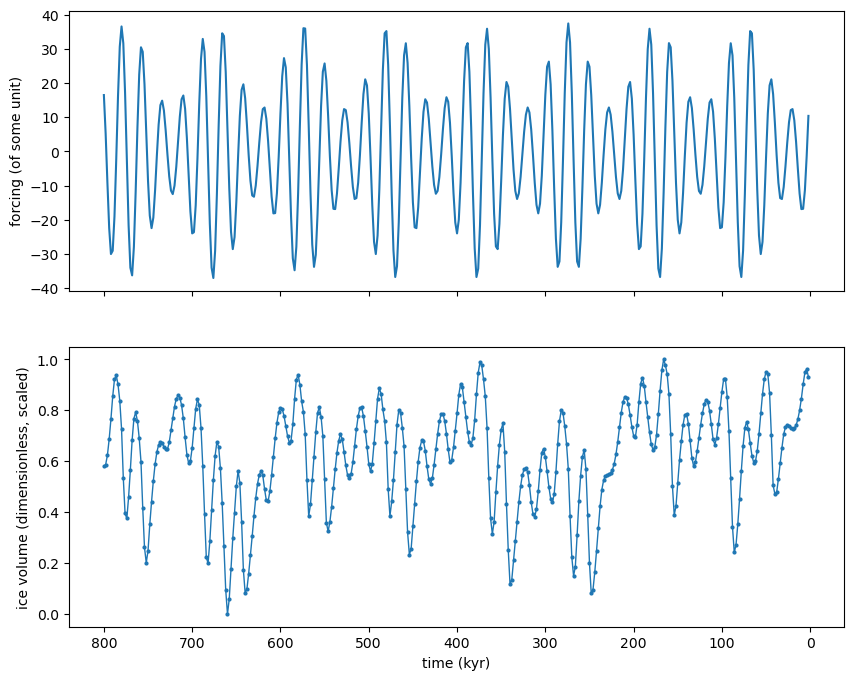

In [8]:
t_range = np.arange(max(solution.t)-800, max(solution.t), 2)

ice_vol = solution.sol(t_range)[0].reshape(-1, 1)
ice_vol_ss = MinMaxScaler().fit_transform(ice_vol)

forcing = calc_f(t_range, A, eps)

ticks = np.linspace(max(solution.t)-800, max(solution.t), 9)  # Generate 6 ticks from 800 to 3000
tick_labels = [str(int(max(solution.t) - tick)) for tick in ticks]  # Calculate labels 800 to 0


fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax[0].plot(t_range, forcing, linewidth=1)
ax[0].set_ylabel('forcing (of some unit)')

ax[1].plot(t_range, ice_vol_ss, linewidth=1, marker='o', markersize=2)
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(tick_labels)
ax[1].set_ylabel('ice volume (dimensionless, scaled)')
ax[1].set_xlabel('time (kyr)')